## Bibliotecas Utilizadas

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
from datetime import datetime, time

In [2]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-19 23:58:46


# Funções

In [3]:
def build_grayscale_image(image):
    image = tf.image.convert_image_dtype(image , tf.float32)
    return tf.image.rgb_to_grayscale(image)

In [4]:
def build_hsv_grayscale_image(image):
    image = tf.image.convert_image_dtype(image , tf.float32)
    gray_image = tf.image.rgb_to_grayscale(image)
    image = tf.image.rgb_to_hsv(image)
    rez = tf.concat([image , gray_image], 2)
    return rez

In [5]:
def get_dados(path, size):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = img_to_array(load_img(arquivo, target_size=(size, size)))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [6]:
def get_dados_grayscale(path, size):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = build_grayscale_image(img_to_array(load_img(arquivo, target_size=(size, size))))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [7]:
def get_dados_hsv_grayscale(path, size):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = build_hsv_grayscale_image(img_to_array(load_img(arquivo, target_size=(size, size))))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [8]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [9]:
def CNN_PaperOriginal(num_frutas, size, camadas):
    # Cria o modelo
    model = Sequential()
    
    #Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
    model.add(Conv2D(4, (5, 5), input_shape=(size, size, camadas), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))
    
    #Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(1024, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    model.add(Dense(60, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    #Função de Ativação Softmax
    model.add(Dense(num_frutas, activation='softmax'))
    print(model.output_shape)
    return model

In [10]:
def CNN_LeNet5(num_frutas,size, camadas):
    # Cria o modelo
    model = Sequential()
    #Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
    model.add(Conv2D(6, (5, 5), input_shape=(size, size, camadas), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(AveragePooling2D(pool_size=(2, 2)))
    print( model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (5, 5), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(AveragePooling2D(pool_size=(2, 2)))
    print( model.output_shape)
    
    model.add(Dropout(0.2))

    #Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(240, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))    
    model.add(Dense(120, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))    
    #Função de Ativação Softmax
    model.add(Dense(num_frutas, activation='softmax'))
    print(model.output_shape)
    return model

In [11]:
def CNN_AlexNet(num_frutas,size,camadas):
    # Cria o modelo
    model = Sequential()
    #Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
    model.add(Conv2D(96, (11, 11), input_shape=(size, size, camadas), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(3, 3)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(3, 3)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(384, (3, 3), activation='relu'))#
    print(model.output_shape)
    model.add(Dropout(0.2))

    model.add(Conv2D(384, (3, 3), activation='relu'))#
    print(model.output_shape)
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), activation='relu'))#
    print(model.output_shape)
    model.add(Dropout(0.2))

    #Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(512, activation='relu'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    #Função de Ativação Softmax
    model.add(Dense(num_frutas, activation='softmax'))
    print(model.output_shape)
    return model

# Rodando Algoritmos

In [12]:
path_treino = './fruits-15/Training' 
path_teste = './fruits-15/Test'

In [13]:
X_frutas, Y_frutas = get_dados(path_treino, 100)
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)
X_train = X_train.astype('float32')/255
num_frutas = len(list(set(Y_train)))
print(num_frutas)
Y_train = to_categorical(Y_train, num_frutas)

X_train, x_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
5 - Kiwi
6 - Lemon
7 - Mango
8 - Maracuja
9 - Orange
10 - Papaya
11 - Pear
12 - Pineapple
13 - Raspberry
14 - Strawberry
15


(None, 96, 96, 4)
(None, 48, 48, 4)
(None, 44, 44, 16)
(None, 22, 22, 16)
(None, 18, 18, 32)
(None, 9, 9, 32)
(None, 5, 5, 64)
(None, 2, 2, 64)
(None, 256)
(None, 1024)
(None, 256)
(None, 60)
(None, 15)
Train on 6431 samples, validate on 1608 samples
Epoch 1/50
6431/6431 [==============================] - 10s 2ms/step - loss: 1.2239 - accuracy: 0.6027 - val_loss: 0.5763 - val_accuracy: 0.8060
Epoch 2/50
6431/6431 [==============================] - 7s 1ms/step - loss: 0.2236 - accuracy: 0.9409 - val_loss: 0.1784 - val_accuracy: 0.9453
Epoch 3/50
6431/6431 [==============================] - 7s 1ms/step - loss: 0.0925 - accuracy: 0.9787 - val_loss: 0.1995 - val_accuracy: 0.9347
Epoch 4/50
6431/6431 [==============================] - 7s 1ms/step - loss: 0.0697 - accuracy: 0.9818 - val_loss: 0.0985 - val_accuracy: 0.9627
Epoch 5/50
6431/6431 [==============================] - 7s 1ms/step - loss: 0.0394 - accuracy: 0.9913 - val_loss: 0.2257 - val_accuracy: 0.9210
Epoch 6/50
6431/6431 [======

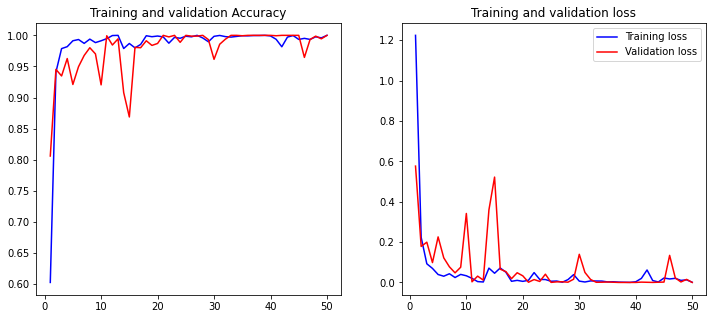

In [14]:
model = CNN_PaperOriginal(num_frutas,100,3)
#plot_model(model, show_shapes=True, show_layer_names=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath='./modelo_cnn_8.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy')
history = model.fit(X_train, Y_train, validation_data = (x_val, y_val), epochs=50, batch_size=60, callbacks=[checkpoint])
plot_history(history)
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))
X_train = None
Y_train = None
x_val = None
y_val = None

# Gray Scale

In [16]:
X_frutas, Y_frutas = get_dados_grayscale(path_treino, 28)
X_train_grayscale = np.asarray(X_frutas).astype(np.float32)
Y_train_grayscale = np.asarray(Y_frutas)
X_train_grayscale = X_train_grayscale.astype('float32')/255
num_frutas = len(list(set(Y_train_grayscale)))
print(num_frutas)
Y_train_grayscale = to_categorical(Y_train_grayscale, num_frutas)

X_train_grayscale, x_val_grayscale, Y_train_grayscale, y_val_grayscale = train_test_split(X_train_grayscale, Y_train_grayscale, test_size=0.2, random_state=42)

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
5 - Kiwi
6 - Lemon
7 - Mango
8 - Maracuja
9 - Orange
10 - Papaya
11 - Pear
12 - Pineapple
13 - Raspberry
14 - Strawberry
15


(None, 24, 24, 6)
(None, 12, 12, 6)
(None, 8, 8, 16)
(None, 4, 4, 16)
(None, 256)
(None, 240)
(None, 120)
(None, 15)
Train on 6431 samples, validate on 1608 samples
Epoch 1/50
6431/6431 [==============================] - 2s 249us/step - loss: 1.6327 - accuracy: 0.4618 - val_loss: 0.7734 - val_accuracy: 0.7351
Epoch 2/50
6431/6431 [==============================] - 1s 139us/step - loss: 0.7889 - accuracy: 0.7165 - val_loss: 0.4344 - val_accuracy: 0.8750
Epoch 3/50
6431/6431 [==============================] - 1s 136us/step - loss: 0.5561 - accuracy: 0.7983 - val_loss: 0.3305 - val_accuracy: 0.8856
Epoch 4/50
6431/6431 [==============================] - 1s 147us/step - loss: 0.4317 - accuracy: 0.8498 - val_loss: 0.1987 - val_accuracy: 0.9565
Epoch 5/50
6431/6431 [==============================] - 1s 136us/step - loss: 0.3414 - accuracy: 0.8857 - val_loss: 0.1281 - val_accuracy: 0.9801
Epoch 6/50
6431/6431 [==============================] - 1s 142us/step - loss: 0.2672 - accuracy: 0.9120 -

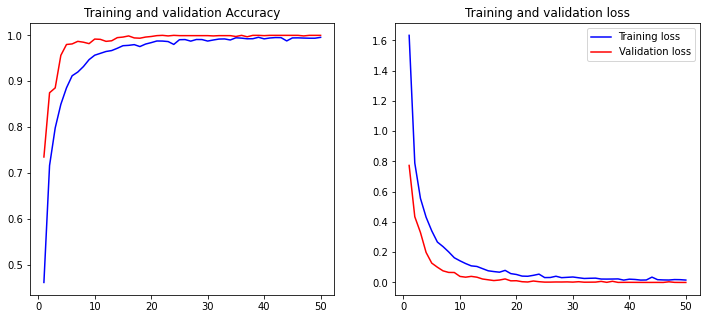

In [17]:
model = CNN_LeNet5(num_frutas,28,1)
#plot_model(model, show_shapes=True, show_layer_names=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath='./modelo_cnn_LeNet_8.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy')
history = model.fit(X_train_grayscale, Y_train_grayscale, validation_data = (x_val_grayscale, y_val_grayscale), epochs=50, batch_size=60, callbacks=[checkpoint])
plot_history(history)
scores = model.evaluate(X_train_grayscale, Y_train_grayscale, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))
X_train_grayscale = None
Y_train_grayscale = None
x_val_grayscale = None
y_val_grayscale = None

# HSV_GrayScale

In [19]:
X_frutas, Y_frutas = get_dados_hsv_grayscale(path_treino, 100)
X_train_hsv_grayscale = np.asarray(X_frutas).astype(np.float32)
Y_train_hsv_grayscale = np.asarray(Y_frutas)
X_train_hsv_grayscale = X_train_hsv_grayscale.astype('float32')/255
num_frutas = len(list(set(Y_train_hsv_grayscale)))
print(num_frutas)
Y_train_hsv_grayscale = to_categorical(Y_train_hsv_grayscale, num_frutas)

X_train_hsv_grayscale, x_val_hsv_grayscale, Y_train_hsv_grayscale, y_val_hsv_grayscale = train_test_split(X_train_hsv_grayscale, Y_train_hsv_grayscale, test_size=0.2, random_state=42)

In [20]:
model = CNN_AlexNet(num_frutas,100,4)
plot_model(model, show_shapes=True, show_layer_names=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath='./modelo_cnn_AlexNet_8.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy')
history = model.fit(X_train_hsv_grayscale, Y_train_hsv_grayscale, validation_data = (x_val_hsv_grayscale, y_val_hsv_grayscale), epochs=50, batch_size=60, callbacks=[checkpoint])
plot_history(history)
scores = model.evaluate(X_train_grayscale, Y_train_grayscale, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))
X_train_hsv_grayscale = None
Y_train_hsv_grayscale = None
x_val_hsv_grayscale = None
y_val_hsv_grayscale = None

# Teste

In [ ]:
X_frutas, Y_frutas = get_dados(path_teste, 100)
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)
X_test = X_test.astype('float32')/255
Y_test = to_categorical(Y_test, num_frutas)
model = load_model('./modelo_cnn_8.hdf5')
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

In [ ]:
X_frutas, Y_frutas = get_dados_grayscale(path_teste, 28)
X_test_grayscale = np.asarray(X_frutas).astype(np.float32)
Y_test_grayscale = np.asarray(Y_frutas)
X_test_grayscale = X_test_grayscale.astype('float32')/255
Y_test_grayscale = to_categorical(Y_test_grayscale, num_frutas)
model = load_model('./modelo_cnn_LeNet_8.hdf5')
scores = model.evaluate(X_test_grayscale, Y_test_grayscale, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

In [21]:
X_frutas, Y_frutas = get_dados_hsv_grayscale(path_teste, 28)
X_test_hsv_grayscale = np.asarray(X_frutas).astype(np.float32)
Y_test_hsv_grayscale = np.asarray(Y_frutas)
X_test_hsv_grayscale = X_test_hsv_grayscale.astype('float32')/255
Y_test_hsv_grayscale = to_categorical(Y_test_hsv_grayscale, num_frutas)
model = load_model('./modelo_cnn_AlexNet_8_1.hdf5')
scores = model.evaluate(X_test_hsv_grayscale, Y_test_hsv_grayscale, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

In [22]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Fim Execução : 
2021-07-20 00:06:44
